In [1]:
suppressMessages(library(dplyr))
library(ggplot2)
library(patchwork)

In [2]:
wd <- '/iblm/netapp/data1/jezhou/crisprQTL/multiplicative_vs_additive_330_pairs'

# Get RDS files containing fitted additive models

In [3]:
add.mods <- readRDS(file.path(wd, 'fitted_additive_mods_null.rds'))

In [4]:
length(add.mods)

[1] 330

Check for convergence

In [5]:
add.convergence <- lapply(add.mods, function(x) {x$convergence})

In [6]:
unconverged.ix <- c()
j <- 1

for (i in 1:length(add.convergence)) {
    if (is.null(add.convergence[[i]])) {
        unconverged.ix[j] <- i
        j <- j + 1
    } else if (add.convergence[[i]] != 0) {
        unconverged.ix[j] <- i
        j <- j + 1
    }
}

In [7]:
unconverged.ix

[1]  32  36  38  39  71  72  74  78  79  80  83  84  85  86  87  88  89  90  91
[20]  92 105 129 138 139 140 206 207 208 226 245 267 268 269 270 271 272 279 299
[39] 300

In [8]:
length(unconverged.ix)

[1] 39

In [9]:
length(add.mods) - length(unconverged.ix)

[1] 291

# Load AIC table

In [10]:
aic.df <- read.csv(file.path(wd, "aic_summary.csv"), header = TRUE)
head(aic.df, n= 10)

,gene,enhancer1,enhancer2,AIC.log,AIC.identity
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,ENSG00000005249,chr7.4040,chr7.4045,580610.4,585463.5
2,ENSG00000005249,chr7.4040,chr7.4046,580630.0,584817.8
3,ENSG00000005249,chr7.4040,chr7.4041,580654.6,585157.6
4,ENSG00000005249,chr7.4040,chr7.4042,580675.8,585097.4
5,ENSG00000005249,chr7.4040,chr7.4048,580690.2,584724.6
6,ENSG00000005249,chr7.4040,chr7.4050,580696.4,584085.0
7,ENSG00000005249,chr7.4045,chr7.4046,580662.3,585497.6
8,ENSG00000005249,chr7.4045,chr7.4041,580685.6,585944.6
9,ENSG00000005249,chr7.4045,chr7.4042,580707.3,586160.7


Check that AIC results matches number of fitted models.

In [11]:
nrow(aic.df) == (length(add.mods) - length(unconverged.ix))

[1] TRUE

How many cases represent unique target genes?

In [12]:
length(unique(aic.df$gene))

[1] 103

# Compare AIC of multiplicative vs. additive models

In [13]:
all(aic.df$AIC.log < aic.df$AIC.identity)

[1] TRUE

# Calculate $\Delta AIC$

In [14]:
aic.df$delta.aic <- aic.df$AIC.log - aic.df$AIC.identity

# Plot

In [15]:
aic.plotdf <- aic.df %>% tidyr::pivot_longer(c(AIC.log, AIC.identity, delta.aic), names_to = "score", values_to = "value")

### Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



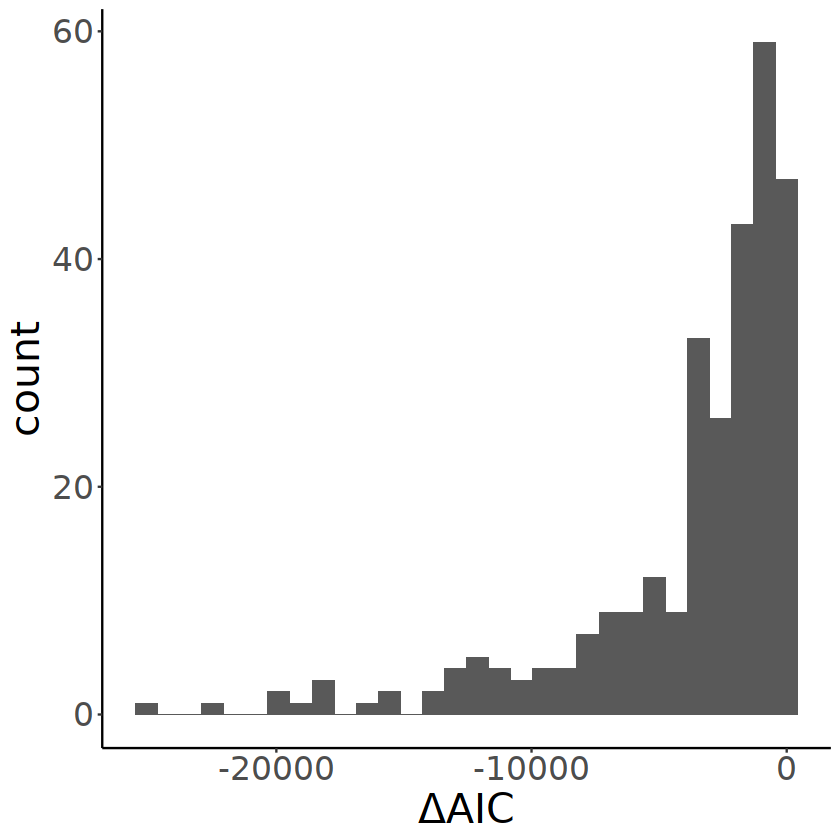

In [16]:
# aic.hist <- hist(aic.df$delta.aic)
aic.hist <- ggplot(aic.plotdf %>% filter(score == "delta.aic"), aes(x = value)) + 
                geom_histogram() + xlab(expression(paste(Delta, "AIC"))) +
                theme_classic() +
                theme(text = element_text(size = 24))
aic.hist

In [17]:
# pdf(file.path(wd,"delta_AIC_hist.pdf"), width = 6, height = 4)
pdf("../multiplicative_vs_additive_delta_AIC_hist.pdf", width = 6, height = 6)
print(aic.hist)
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

In [18]:
png("../multiplicative_vs_additive_delta_AIC_hist.png", 
    res = 300, units = "in", width = 6, height = 6)
print(aic.hist)
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

### Jitterplot

In [23]:
head(aic.df)

,gene,enhancer1,enhancer2,AIC.log,AIC.identity,delta.aic
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,ENSG00000005249,chr7.4040,chr7.4045,580610.4,585463.5,-4853.030
2,ENSG00000005249,chr7.4040,chr7.4046,580630.0,584817.8,-4187.853
3,ENSG00000005249,chr7.4040,chr7.4041,580654.6,585157.6,-4503.006
4,ENSG00000005249,chr7.4040,chr7.4042,580675.8,585097.4,-4421.532
5,ENSG00000005249,chr7.4040,chr7.4048,580690.2,584724.6,-4034.429
6,ENSG00000005249,chr7.4040,chr7.4050,580696.4,584085.0,-3388.586


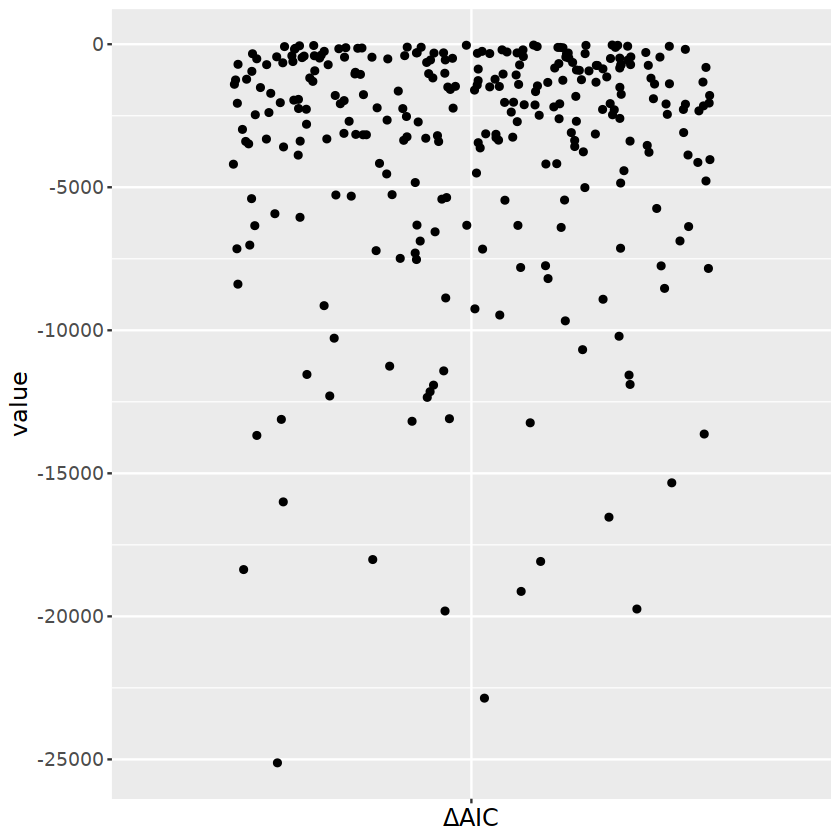

In [58]:
aic.jitter <- ggplot(aic.plotdf %>% filter(score=="delta.aic"), aes(x = score, y = value)) + 
                geom_jitter() + xlab(expression(paste(Delta, "AIC"))) +
                theme(text = element_text(size = 14),
                     axis.text.x = element_blank())
aic.jitter

### Violinplot (with jitter)

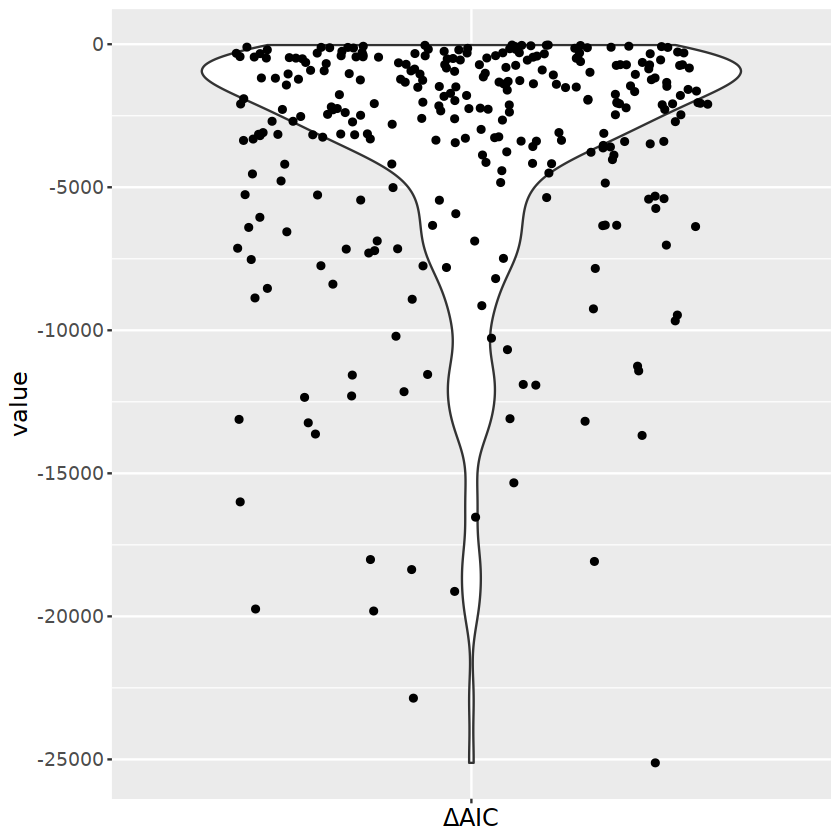

In [59]:
aic.vln <- ggplot(aic.plotdf %>% filter(score=="delta.aic"), aes(x = score, y = value)) + 
            geom_violin() + geom_jitter() + xlab(expression(paste(Delta, "AIC"))) +
                theme(text = element_text(size = 14),
                     axis.text.x = element_blank())
aic.vln

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



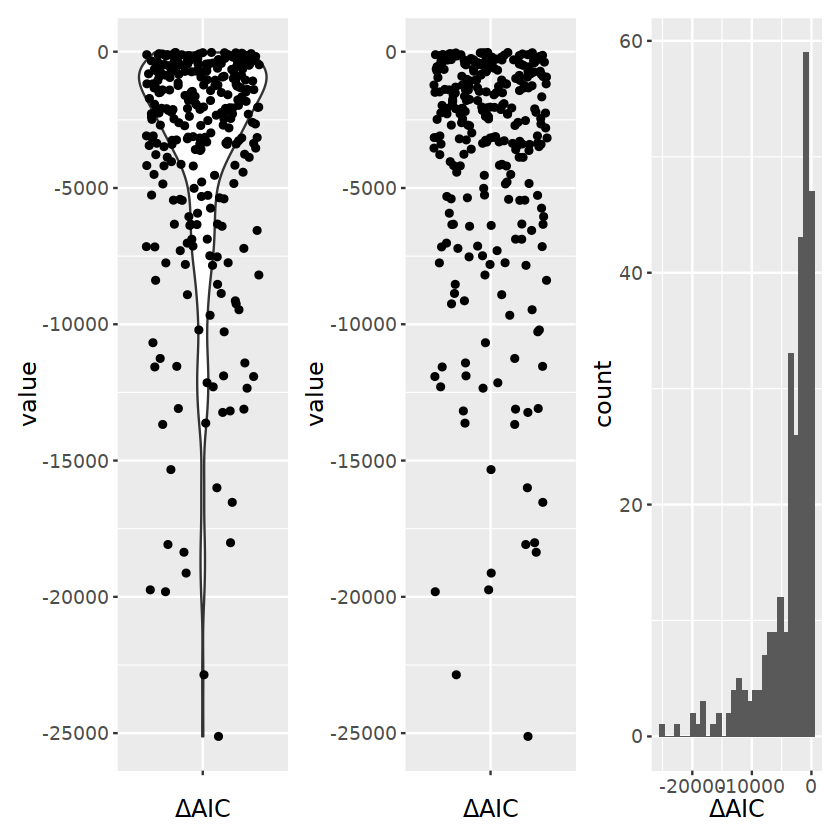

In [60]:
aic.vln | aic.jitter | aic.hist

In [61]:
png("../aic_visualization_options.png", res = 300, units = "in", width = 12, height = 6)
print(aic.vln | aic.jitter | aic.hist)
dev.off()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2